Notebook on learning R, \gamma and p simultaneously using Environment Design

In [1]:
import os

curr_dir = os.path.split(os.getcwd())[1]
if curr_dir != "irl-environment-design":
    os.chdir("..")

In [2]:
from copy import deepcopy

import matplotlib.pyplot as plt
import numpy as np

from src.utils.inference.sampling import bayesian_parameter_learning
from src.utils.make_environment import transition_matrix, Environment, insert_walls_into_T
from src.utils.visualization import plot_posterior_distribution, plot_environment, plot_trajectories, mcmc_diagnostics, plot_log_likelihood
from src.utils.constants import ParamTuple, beta_agent
from src.utils.optimization import soft_q_iteration
from src.utils.inference.rollouts import generate_n_trajectories

np.set_printoptions(linewidth=160, precision=2)

Create Environment

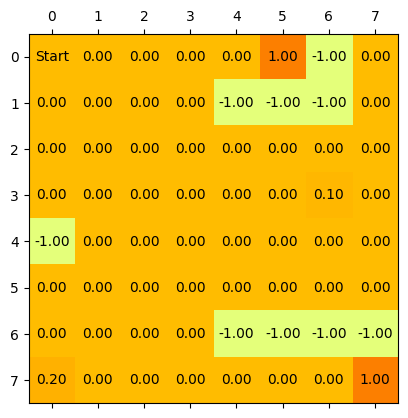

In [3]:
# 0. Setup
## 0.1 Setup the experiment
n_env_samples = 15
n_posterior_samples = 10
n_traj_per_sample = 2

## 0.2 Setup the environment
N, M = 8,8
n_states, n_actions = N * M, 4

# TODO describe world
agent_R = np.zeros((N, M))
agent_R[0, M-3] = 1
agent_R[3, M-2] = 0.1
agent_R[N-1, 0] = 0.2
agent_R[N-1, M-1] = 1
agent_R[4, 0] = -1

agent_R[1, M-4] = -1
agent_R[1, M-3] = -1
agent_R[1, M-2] = -1
agent_R[0, M-2] = -1

agent_R[N-2, M-4] = -1
agent_R[N-2, M-3] = -1
agent_R[N-2, M-2] = -1
agent_R[N-2, M-1] = -1

plot_environment(
    agent_R.reshape(N, M),
    [])

# Start by making the agent we want to learn the policy of
agent_p = 0.9
agent_gamma = 0.8
p_true=0.999

agent_R = agent_R.flatten()
goal_states = np.where(agent_R != 0)[0]

true_params = ParamTuple(agent_p, agent_gamma, agent_R)

n_samples_MC = 1_000
n_burnin_MC = 500

# Prior Sampling

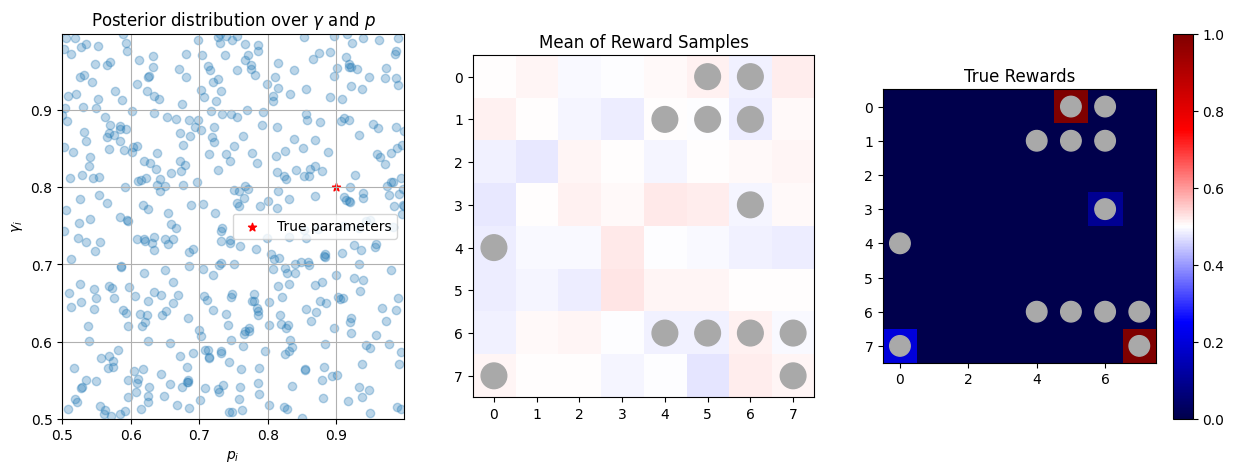

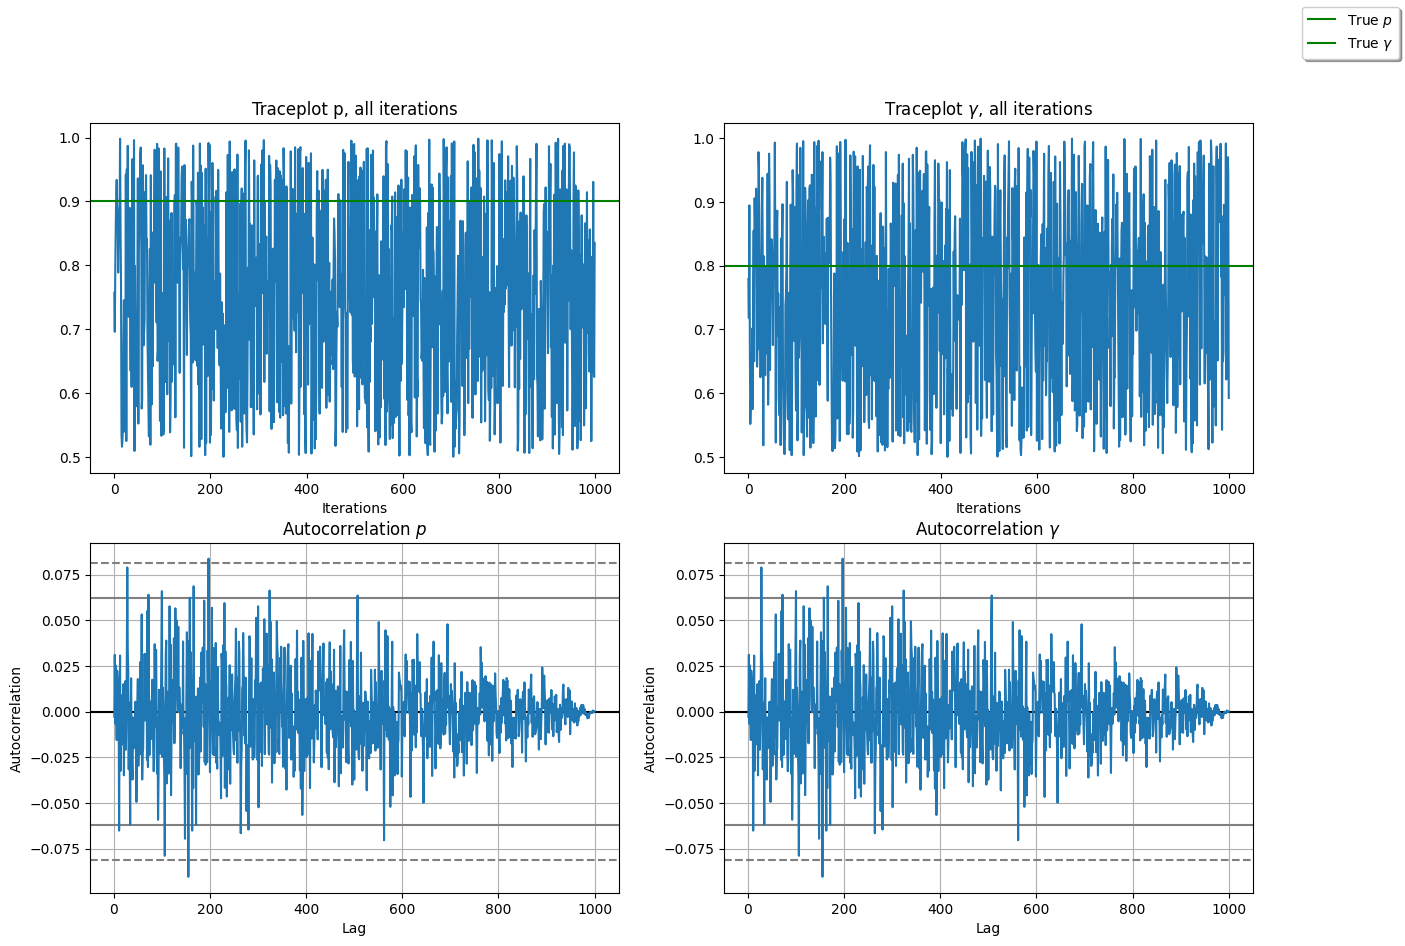

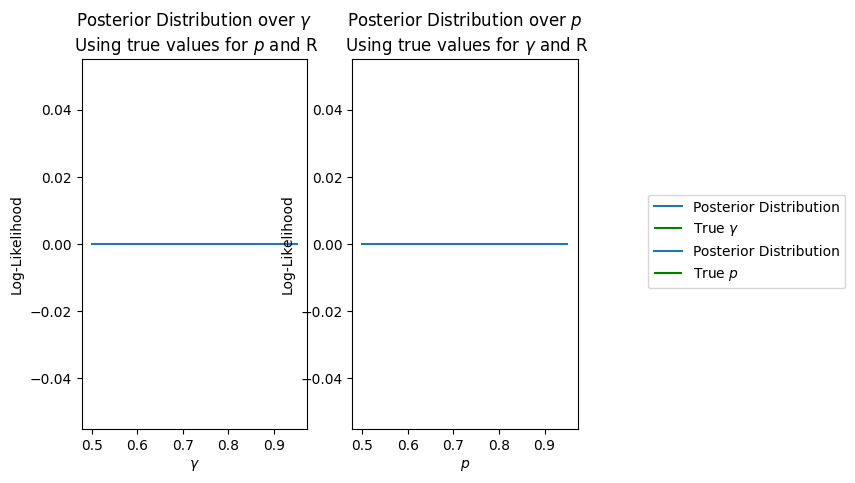

In [4]:
posterior_samples_0 = bayesian_parameter_learning(expert_trajectories=[], 
                                                  sample_size=n_samples_MC, 
                                                  goal_states=goal_states, 
                                                  n_states=n_states)

plot_posterior_distribution(posterior_samples=posterior_samples_0[n_burnin_MC:], N=N, M=M, absorbing_states=goal_states, true_params=true_params)

mcmc_diagnostics(posterior_samples_0, true_params=true_params)

plot_log_likelihood(param_values=true_params, expert_trajectories=[], goal_states=goal_states)

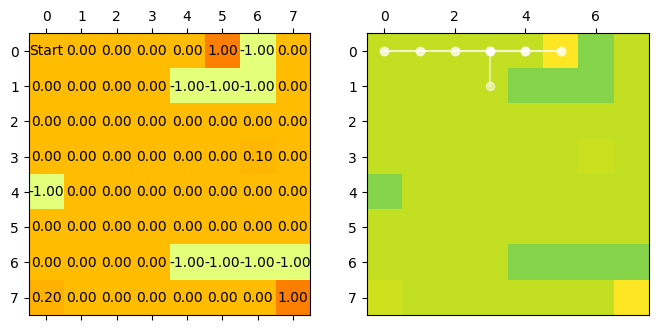

In [5]:
# Generate 2 trajectories in the env starting environment
wall_states = []
T_true = transition_matrix(N, M, p=p_true, absorbing_states=goal_states)
T_agent = transition_matrix(N, M, p=agent_p, absorbing_states=goal_states)
agent_policy = soft_q_iteration(agent_R, T_agent, gamma=agent_gamma, beta=100)

env_agent = Environment(N=N,M=M,T_true=T_true,wall_states=wall_states, R_sample_mean=None, start_state=0, n_walls=None)

# Generate trajectories
trajectories = generate_n_trajectories(
    T_agent,
    agent_policy,
    goal_states,
    n_trajectories=2,
)

expert_trajectories_1 = [(env_agent, trajectories)]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
plot_environment(
    agent_R.reshape(N, M),
    env_agent.wall_states,
    start_state=(env_agent.start_state // M, env_agent.start_state % M),
    ax=ax1,
)

# Show the trajectories
plot_trajectories(N, M, trajectories, agent_R, ax=ax2)

# Remove the colorbar from the second plot
ax2.get_images()[0].colorbar.remove()

## After Iteration 1


Posterior sampling:   0%|          | 0/1000 [00:00<?, ?it/s]

Posterior sampling:  34%|███▍      | 344/1000 [00:30<04:07,  2.65it/s, Acceptance rate=20.5, step_size=0.11]

encountered an impossible transition in my trajectory. this can't be. ignoring it for likelihood
current (s,a,next_s) tuple:  (4, 1, 3)
encountered an impossible transition in my trajectory. this can't be. ignoring it for likelihood
current (s,a,next_s) tuple:  (4, 1, 5)
encountered an impossible transition in my trajectory. this can't be. ignoring it for likelihood
current (s,a,next_s) tuple:  (4, 1, 5)


Posterior sampling:  47%|████▋     | 472/1000 [00:47<01:01,  8.59it/s, Acceptance rate=22.5, step_size=0.28]

encountered an impossible transition in my trajectory. this can't be. ignoring it for likelihood
current (s,a,next_s) tuple:  (4, 1, 3)
encountered an impossible transition in my trajectory. this can't be. ignoring it for likelihood
current (s,a,next_s) tuple:  (4, 1, 5)
encountered an impossible transition in my trajectory. this can't be. ignoring it for likelihood
current (s,a,next_s) tuple:  (4, 1, 5)


Posterior sampling:  50%|█████     | 502/1000 [00:51<01:24,  5.91it/s, Acceptance rate=21, step_size=0.28]  

encountered an impossible transition in my trajectory. this can't be. ignoring it for likelihood
current (s,a,next_s) tuple:  (4, 1, 3)
encountered an impossible transition in my trajectory. this can't be. ignoring it for likelihood
current (s,a,next_s) tuple:  (4, 1, 5)
encountered an impossible transition in my trajectory. this can't be. ignoring it for likelihood
current (s,a,next_s) tuple:  (4, 1, 5)


Posterior sampling:  97%|█████████▋| 973/1000 [01:32<00:04,  5.71it/s, Acceptance rate=23.4, step_size=0.44]

encountered an impossible transition in my trajectory. this can't be. ignoring it for likelihood
current (s,a,next_s) tuple:  (3, 1, 11)
encountered an impossible transition in my trajectory. this can't be. ignoring it for likelihood
current (s,a,next_s) tuple:  (3, 1, 4)
encountered an impossible transition in my trajectory. this can't be. ignoring it for likelihood
current (s,a,next_s) tuple:  (4, 1, 3)
encountered an impossible transition in my trajectory. this can't be. ignoring it for likelihood
current (s,a,next_s) tuple:  (3, 1, 4)
encountered an impossible transition in my trajectory. this can't be. ignoring it for likelihood
current (s,a,next_s) tuple:  (4, 1, 5)
encountered an impossible transition in my trajectory. this can't be. ignoring it for likelihood
current (s,a,next_s) tuple:  (3, 1, 11)
encountered an impossible transition in my trajectory. this can't be. ignoring it for likelihood
current (s,a,next_s) tuple:  (3, 1, 11)
encountered an impossible transition in my tr

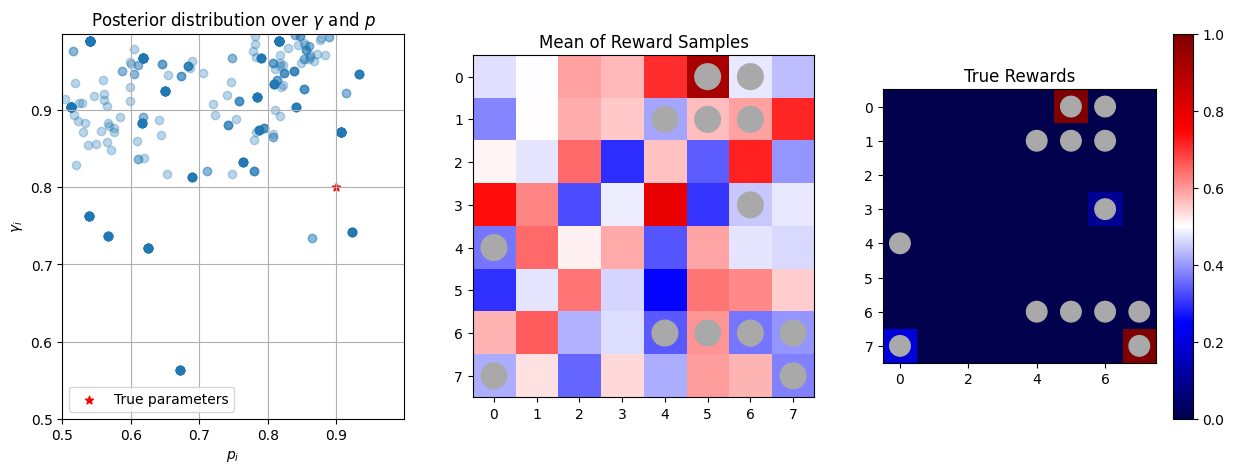

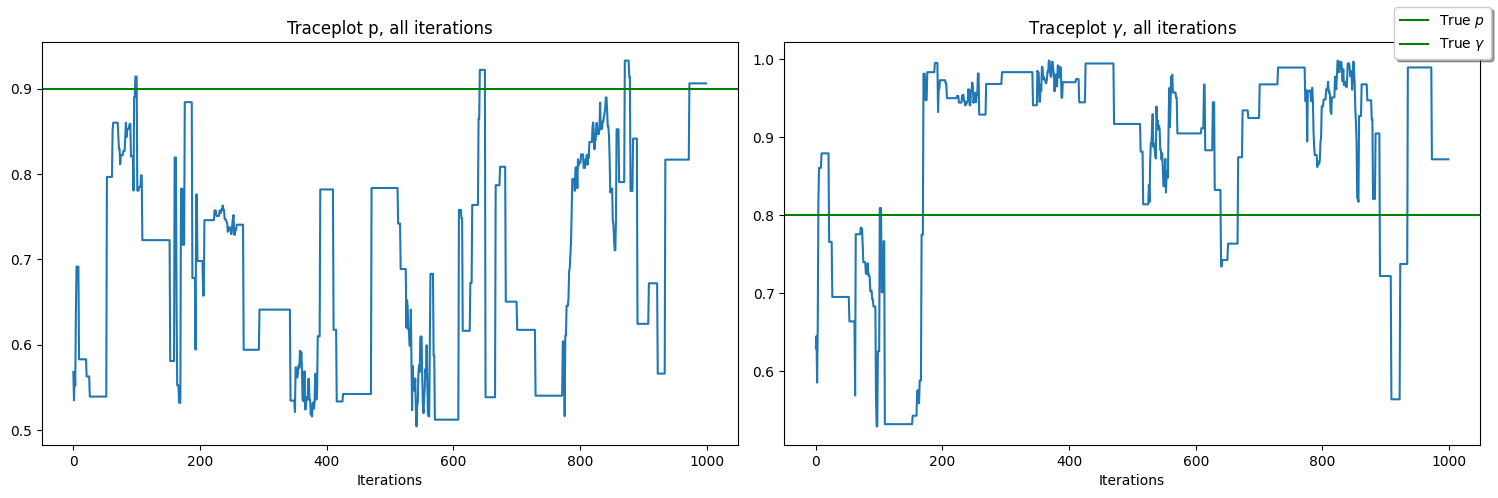

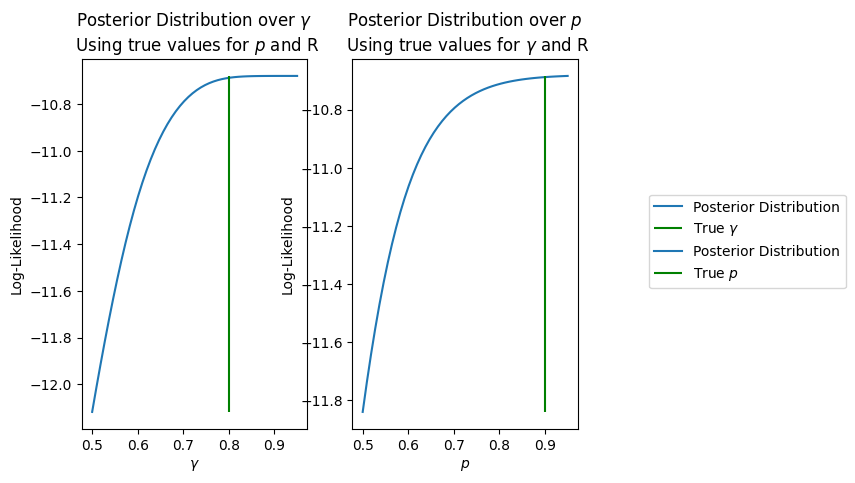

In [6]:
posterior_samples_1 = bayesian_parameter_learning(expert_trajectories=expert_trajectories_1, 
                                                  sample_size=n_samples_MC, 
                                                  goal_states=goal_states, 
                                                  n_states=n_states)

plot_posterior_distribution(posterior_samples=posterior_samples_1[n_burnin_MC:], N=N, M=M, absorbing_states=goal_states, true_params=true_params)

mcmc_diagnostics(posterior_samples_1, true_params=true_params)

plot_log_likelihood(param_values=true_params, expert_trajectories=expert_trajectories_1, goal_states=goal_states)

#### Create the unknown true agent and trajectories in the chosen environment


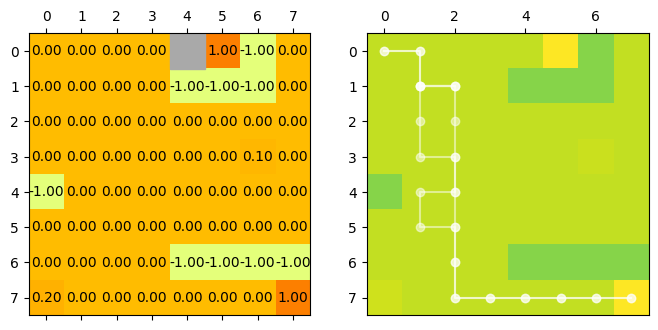

In [7]:
# Generate 2 trajectories in the second round environment
wall_states = [4]

'''
hard code, wall states are absorbing
'''
# goal_states = np.append(goal_states, wall_states)
T_agent = transition_matrix(N, M, p=agent_p, absorbing_states=goal_states)
T_agent = insert_walls_into_T(T_agent, wall_indices=wall_states)
T_true_iteration_2 = transition_matrix(N, M, p=p_true, absorbing_states=goal_states)

'''this is new, we need to add the walls in the environment
#when we do the rollout, otherwise expert behavior makes no sense'''
# T_true_iteration_2 = insert_walls_into_T(T_true_iteration_2, wall_indices=wall_states) 


agent_policy = soft_q_iteration(agent_R, T_agent, gamma=agent_gamma, beta=100)

env_agent_2 = Environment(N=N,M=M,T_true=T_true_iteration_2,wall_states=wall_states, R_sample_mean=None, start_state=0, n_walls=None)

# Generate trajectories
trajectories_2 = generate_n_trajectories(
    T_agent,
    agent_policy,
    goal_states,
    n_trajectories=2,
)
# expert_trajectories = [(env_agent_2, trajectories_2)]
expert_trajectories_2 = expert_trajectories_1
expert_trajectories_2.append([env_agent_2, trajectories_2])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
plot_environment(
    agent_R.reshape(N, M),
    env_agent_2.wall_states,
    start_state=(0),
    ax=ax1,
)

# Show the trajectories
plot_trajectories(N, M, trajectories_2, agent_R, ax=ax2)

# Remove the colorbar from the second plot
ax2.get_images()[0].colorbar.remove()

#### Sample from the posterior under these trajectories


Posterior sampling:   3%|▎         | 28/1000 [00:01<01:01, 15.91it/s, Acceptance rate=26.7, step_size=0.38]

encountered an impossible transition in my trajectory. this can't be. ignoring it for likelihood
current (s,a,next_s) tuple:  (4, 1, 3)
encountered an impossible transition in my trajectory. this can't be. ignoring it for likelihood
current (s,a,next_s) tuple:  (4, 1, 5)
encountered an impossible transition in my trajectory. this can't be. ignoring it for likelihood
current (s,a,next_s) tuple:  (4, 1, 5)


Posterior sampling:   3%|▎         | 34/1000 [00:04<03:39,  4.41it/s, Acceptance rate=24.3, step_size=0.43]

encountered an impossible transition in my trajectory. this can't be. ignoring it for likelihood
current (s,a,next_s) tuple:  (62, 1, 63)
encountered an impossible transition in my trajectory. this can't be. ignoring it for likelihood
current (s,a,next_s) tuple:  (62, 1, 63)


Posterior sampling:  63%|██████▎   | 633/1000 [00:55<00:18, 19.84it/s, Acceptance rate=21.9, step_size=0.35]

encountered an impossible transition in my trajectory. this can't be. ignoring it for likelihood
current (s,a,next_s) tuple:  (3, 1, 11)
encountered an impossible transition in my trajectory. this can't be. ignoring it for likelihood
current (s,a,next_s) tuple:  (3, 1, 4)
encountered an impossible transition in my trajectory. this can't be. ignoring it for likelihood
current (s,a,next_s) tuple:  (4, 1, 3)
encountered an impossible transition in my trajectory. this can't be. ignoring it for likelihood
current (s,a,next_s) tuple:  (3, 1, 4)
encountered an impossible transition in my trajectory. this can't be. ignoring it for likelihood
current (s,a,next_s) tuple:  (4, 1, 5)
encountered an impossible transition in my trajectory. this can't be. ignoring it for likelihood
current (s,a,next_s) tuple:  (3, 1, 11)
encountered an impossible transition in my trajectory. this can't be. ignoring it for likelihood
current (s,a,next_s) tuple:  (3, 1, 11)
encountered an impossible transition in my tr

Posterior sampling:  63%|██████▎   | 633/1000 [01:00<00:18, 19.84it/s, Acceptance rate=21.9, step_size=0.35]

encountered an impossible transition in my trajectory. this can't be. ignoring it for likelihood
current (s,a,next_s) tuple:  (59, 1, 60)
encountered an impossible transition in my trajectory. this can't be. ignoring it for likelihood
current (s,a,next_s) tuple:  (59, 1, 60)


Posterior sampling:  68%|██████▊   | 683/1000 [01:03<00:15, 20.02it/s, Acceptance rate=20.9, step_size=0.3] 

encountered an impossible transition in my trajectory. this can't be. ignoring it for likelihood
current (s,a,next_s) tuple:  (3, 1, 11)
encountered an impossible transition in my trajectory. this can't be. ignoring it for likelihood
current (s,a,next_s) tuple:  (3, 1, 4)
encountered an impossible transition in my trajectory. this can't be. ignoring it for likelihood
current (s,a,next_s) tuple:  (4, 1, 3)
encountered an impossible transition in my trajectory. this can't be. ignoring it for likelihood
current (s,a,next_s) tuple:  (3, 1, 4)
encountered an impossible transition in my trajectory. this can't be. ignoring it for likelihood
current (s,a,next_s) tuple:  (4, 1, 5)
encountered an impossible transition in my trajectory. this can't be. ignoring it for likelihood
current (s,a,next_s) tuple:  (3, 1, 11)
encountered an impossible transition in my trajectory. this can't be. ignoring it for likelihood
current (s,a,next_s) tuple:  (3, 1, 11)
encountered an impossible transition in my tr

Posterior sampling:  69%|██████▊   | 686/1000 [01:08<02:33,  2.04it/s, Acceptance rate=20.8, step_size=0.27]

encountered an impossible transition in my trajectory. this can't be. ignoring it for likelihood
current (s,a,next_s) tuple:  (62, 1, 63)
encountered an impossible transition in my trajectory. this can't be. ignoring it for likelihood
current (s,a,next_s) tuple:  (62, 1, 63)


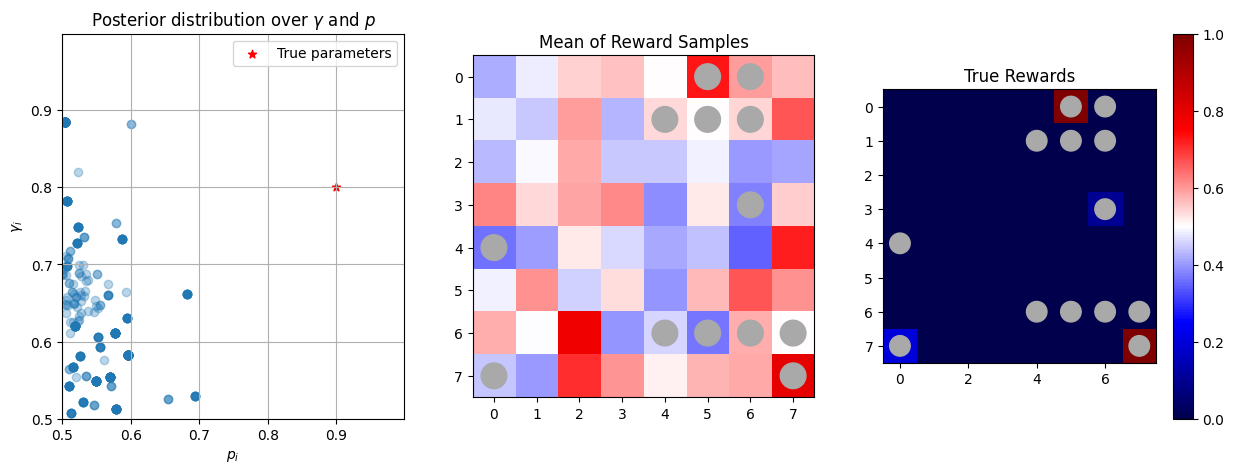

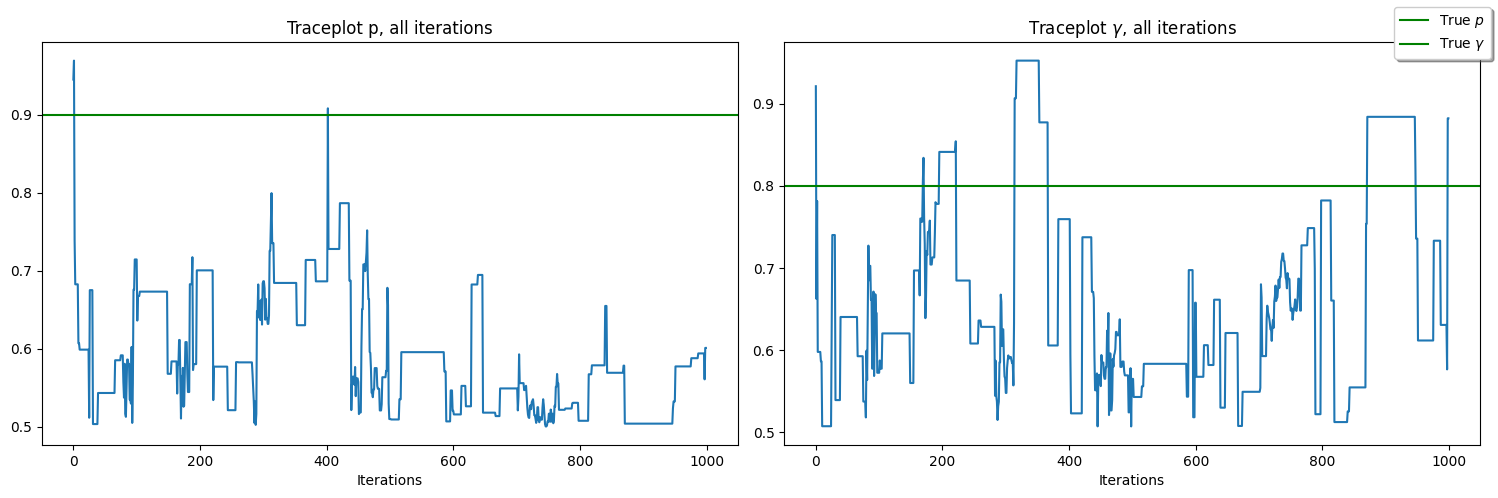

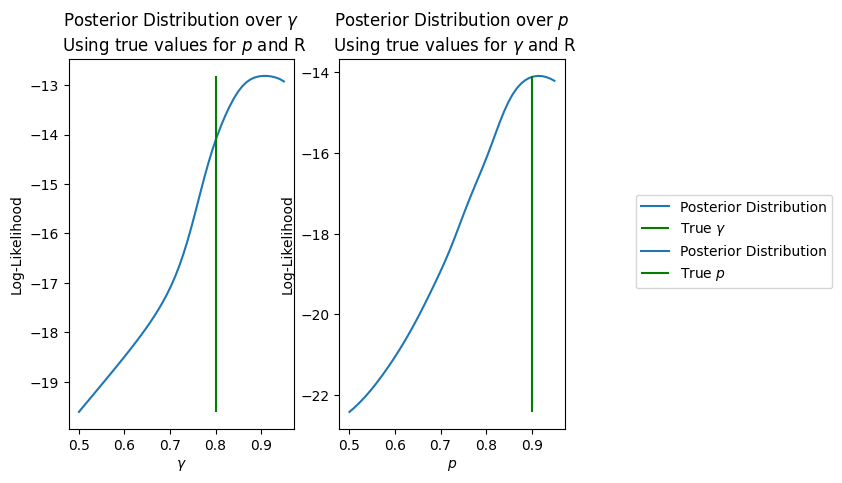

In [8]:
posterior_samples_2 = bayesian_parameter_learning(expert_trajectories=expert_trajectories_2, 
                                                  sample_size=n_samples_MC, 
                                                  goal_states=goal_states, 
                                                  n_states=n_states)

plot_posterior_distribution(posterior_samples=posterior_samples_2[n_burnin_MC:], N=N, M=M, absorbing_states=goal_states, true_params=true_params)

mcmc_diagnostics(posterior_samples_2, true_params=true_params)

plot_log_likelihood(param_values=true_params, expert_trajectories=expert_trajectories_2, goal_states=goal_states)

#### Start round two, maximize regret with the new posterior


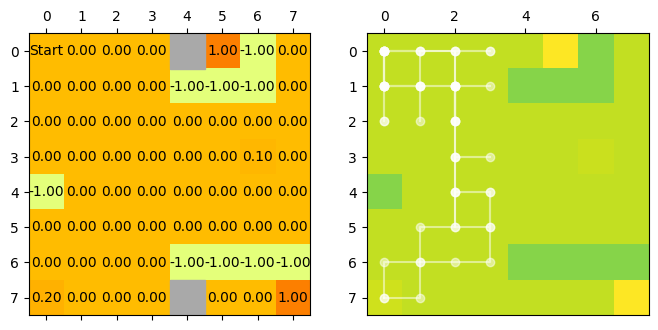

In [9]:
# Generate 2 trajectories in the second round environment
wall_states = [4, (N-1)*M+4]
T_agent = transition_matrix(N, M, p=agent_p, absorbing_states=goal_states)
T_agent = insert_walls_into_T(T_agent, wall_indices=wall_states)
agent_policy = soft_q_iteration(agent_R, T_agent, gamma=agent_gamma, beta=20.0)

env_agent_3 = Environment(N=N,M=M,T_true=T_true,wall_states=wall_states, R_sample_mean=None, start_state=0, n_walls=None)

# Generate trajectories
trajectories_3 = generate_n_trajectories(
    T_agent,
    agent_policy,
    goal_states,
    n_trajectories=2,
)

expert_trajectories_3 = expert_trajectories_2
expert_trajectories_3.append([env_agent_3, trajectories_3])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
plot_environment(
    agent_R.reshape(N, M),
    env_agent_3.wall_states,
    start_state=(env_agent.start_state // M, env_agent.start_state % M),
    ax=ax1,
)

# Show the trajectories
plot_trajectories(N, M, trajectories_3, agent_R, ax=ax2)

# Remove the colorbar from the second plot
ax2.get_images()[0].colorbar.remove()

Posterior sampling:   3%|▎         | 27/1000 [00:02<01:16, 12.80it/s, Acceptance rate=22.2, step_size=0.14]

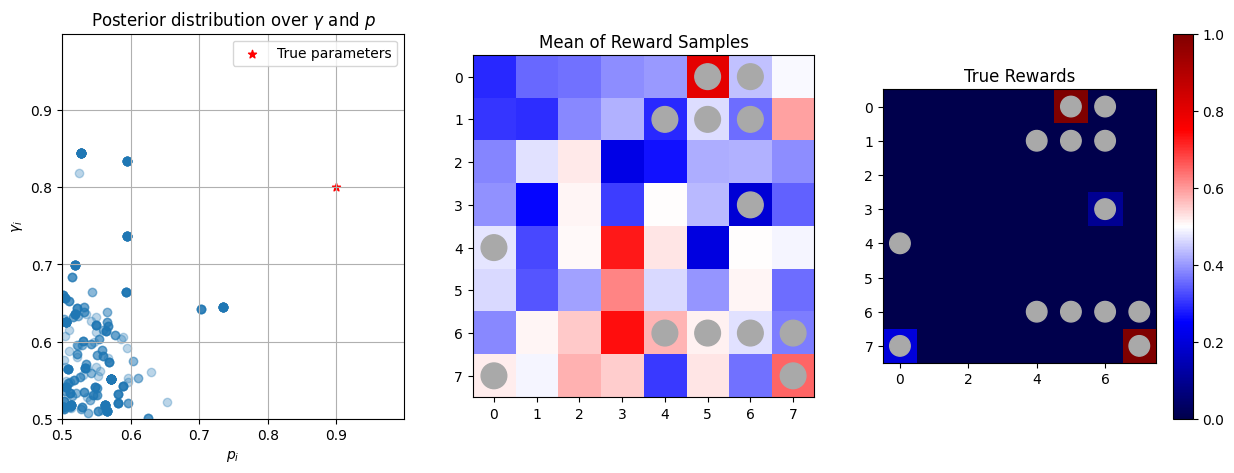

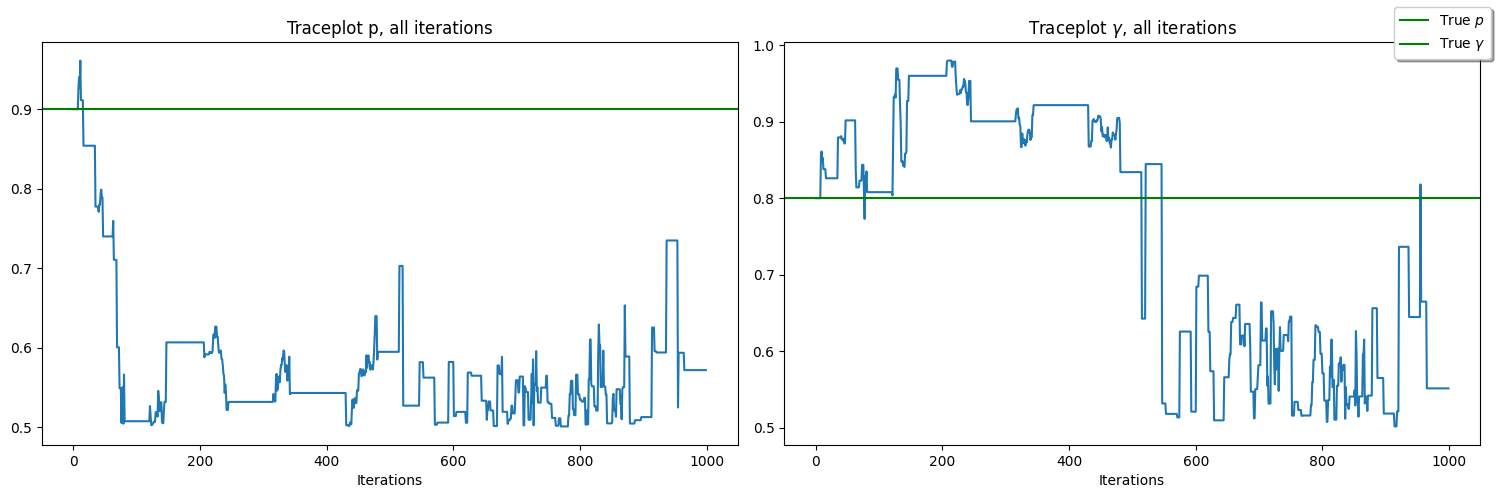

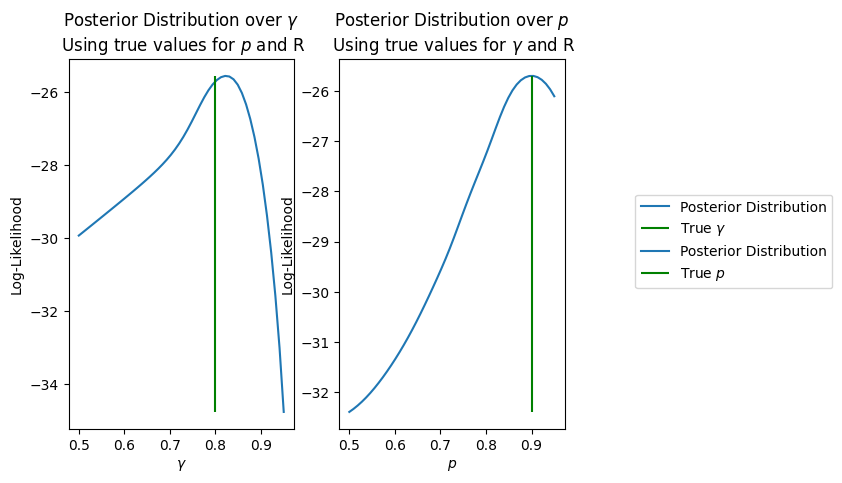

In [10]:
posterior_samples_3 = bayesian_parameter_learning(expert_trajectories=expert_trajectories_3, 
                                                  sample_size=n_samples_MC, 
                                                  goal_states=goal_states, 
                                                  n_states=n_states,
                                                  previous_sample=true_params)

plot_posterior_distribution(posterior_samples=posterior_samples_3[n_burnin_MC:], N=N, M=M, absorbing_states=goal_states, true_params=true_params)

mcmc_diagnostics(posterior_samples_3, true_params=true_params)

plot_log_likelihood(param_values=true_params, expert_trajectories=expert_trajectories_3, goal_states=goal_states)

<Axes: title={'center': 'Autocorrelation $p$'}, xlabel='Lag', ylabel='Autocorrelation'>

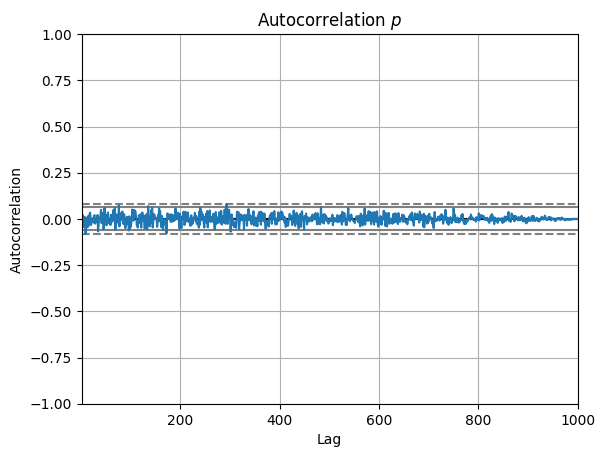

In [19]:
import pandas as pd

ps_0 = [sample[0] for sample in posterior_samples_0]
plt.subplot()
plt.title("Autocorrelation $p$")
pd.plotting.autocorrelation_plot(ps_0)
